In [1]:
import xarray as xr
import xcdat as xc
import numpy as np
import xskillscore as xs

In [2]:
f_a = '/Users/zhang40/Downloads/ERA5-TREFHT-ANN-land_test_30yrs.nc' 
f_b = '/Users/zhang40/Downloads/ERA5-TREFHT-ANN-land_ref_30yrs.nc' 

In [3]:
tas_a = xr.open_dataset(f_a)
tas_b = xr.open_dataset(f_b)

In [4]:
output_grid = tas_a.regridder.grid
tas_b["mask"] = xr.where(~np.isnan(tas_b.TREFHT), 1, 0)
tas_b_regrid_bilinear = tas_b.regridder.horizontal(
            'TREFHT', output_grid, tool='xesmf', method='bilinear'
        )

tas_b_regrid_conservative_normed = tas_b.regridder.horizontal(
            'TREFHT', output_grid, tool='xesmf', method='conservative_normed'
        )

tas_b_regrid_conservative = tas_b.regridder.horizontal(
            'TREFHT', output_grid, tool='xesmf', method='conservative'
        )

In [5]:
# Verify if rmse from xs is same as simple calculation
result_xr_bilinear = xs.rmse(tas_a['TREFHT'], tas_b_regrid_conservative['TREFHT'], dim=["lat", "lon"], weights=None, skipna=True)
rmse_bilinear = np.sqrt(((tas_a['TREFHT'] -tas_b_regrid_conservative['TREFHT']) ** 2).mean(skipna=True))
print('xs. rmse bilinear', result_xr_bilinear.values, 'direct calculation', rmse_bilinear.values)

result_xr_conservative_normed = xs.rmse(tas_a['TREFHT'], tas_b_regrid_conservative_normed['TREFHT'], dim=["lat", "lon"], weights=None, skipna=True)
rmse_normed = np.sqrt(((tas_a['TREFHT'] -tas_b_regrid_conservative_normed['TREFHT']) ** 2).mean(skipna=True))
print('xs. rmse cons_normed', result_xr_conservative_normed.values, 'direct calculation', rmse_normed.values)

result_xr_conservative = xs.rmse(tas_a['TREFHT'], tas_b_regrid_conservative['TREFHT'], dim=["lat", "lon"], weights=None, skipna=True)
rmse_conserve = np.sqrt(((tas_a['TREFHT'] -tas_b_regrid_conservative['TREFHT']) ** 2).mean(skipna=True))
print('xs. rmse conserve', result_xr_conservative.values, 'direct calculation', rmse_conserve.values)


xs. rmse bilinear 2.0316942 direct calculation 2.0316942
xs. rmse cons_normed 1.8655692 direct calculation 1.8655692
xs. rmse conserve 2.0316942 direct calculation 2.0316942


In [6]:
# Calculate area-weighted integral after Conservative Normed regriding

weights = tas_b_regrid_conservative_normed.spatial.get_weights(["X", "Y"], data_var='TREFHT')
area_weighted_integral_normed = (tas_b_regrid_conservative_normed['TREFHT'].fillna(0) * weights).sum(dim=["lat", "lon"])
area_weighted_integral_normed

# Calculate area-weighted integral after Conservative regriding

weights = tas_b_regrid_conservative_normed.spatial.get_weights(["X", "Y"], data_var='TREFHT')
area_weighted_integral = (tas_b_regrid_conservative['TREFHT'].fillna(0) * weights).sum(dim=["lat", "lon"])
area_weighted_integral

# Calculate area-weighted integral of original field
tas_b = tas_b.bounds.add_missing_bounds()
weights0 = tas_b.spatial.get_weights(["X", "Y"], data_var='TREFHT')
area_weighted_integral0 = (tas_b['TREFHT'].fillna(0) * weights0).sum(dim=["lat", "lon"])
area_weighted_integral0


print('area_weighted_integral before regriding',area_weighted_integral0.values)
print('area_weighted_integral after conservative normed regriding',area_weighted_integral_normed.values)
print('area_weighted_integral after conservative regriding',area_weighted_integral.values)


area_weighted_integral before regriding 1771.0478512460697
area_weighted_integral after conservative normed regriding 1967.657722299664
area_weighted_integral after conservative regriding 1770.978281113709


/Users/zhang40/mambaforge/envs/e3sm-unified/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/Users/zhang40/mambaforge/envs/e3sm-unified/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/Users/zhang40/mambaforge/envs/e3sm-unified/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


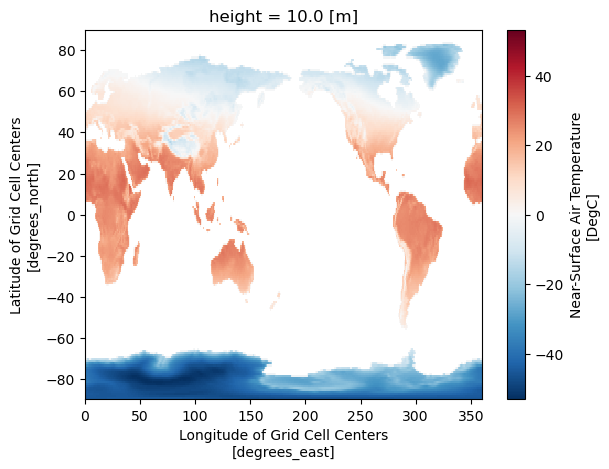

In [8]:
(tas_b_regrid_conservative.TREFHT).plot()

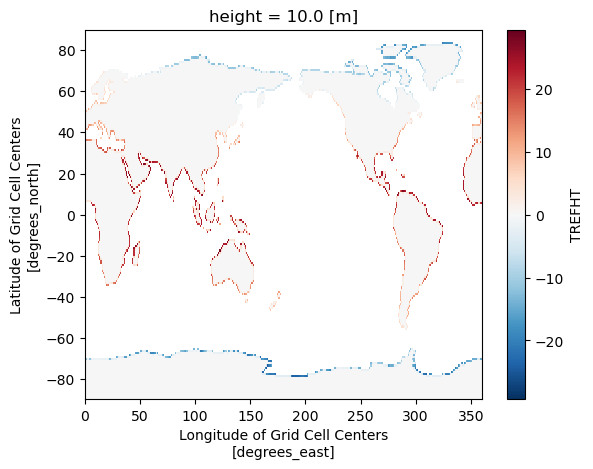

In [9]:
(tas_b_regrid_conservative_normed.TREFHT-tas_b_regrid_conservative.TREFHT).plot()